In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("seaborn")

In [2]:
df = pd.read_csv('USA_Housing.csv')

#### Check for missing values and check the data

In [3]:
#view the data
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#check for null-values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<AxesSubplot:>

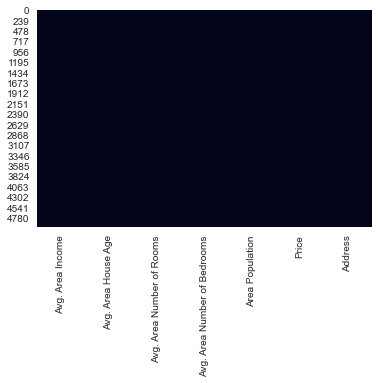

In [7]:
#visulalize the null values
fig,ax = plt.subplots(figsize = (6,4))
sns.heatmap(df.isnull(),cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


### Explonatory Data Analysis

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

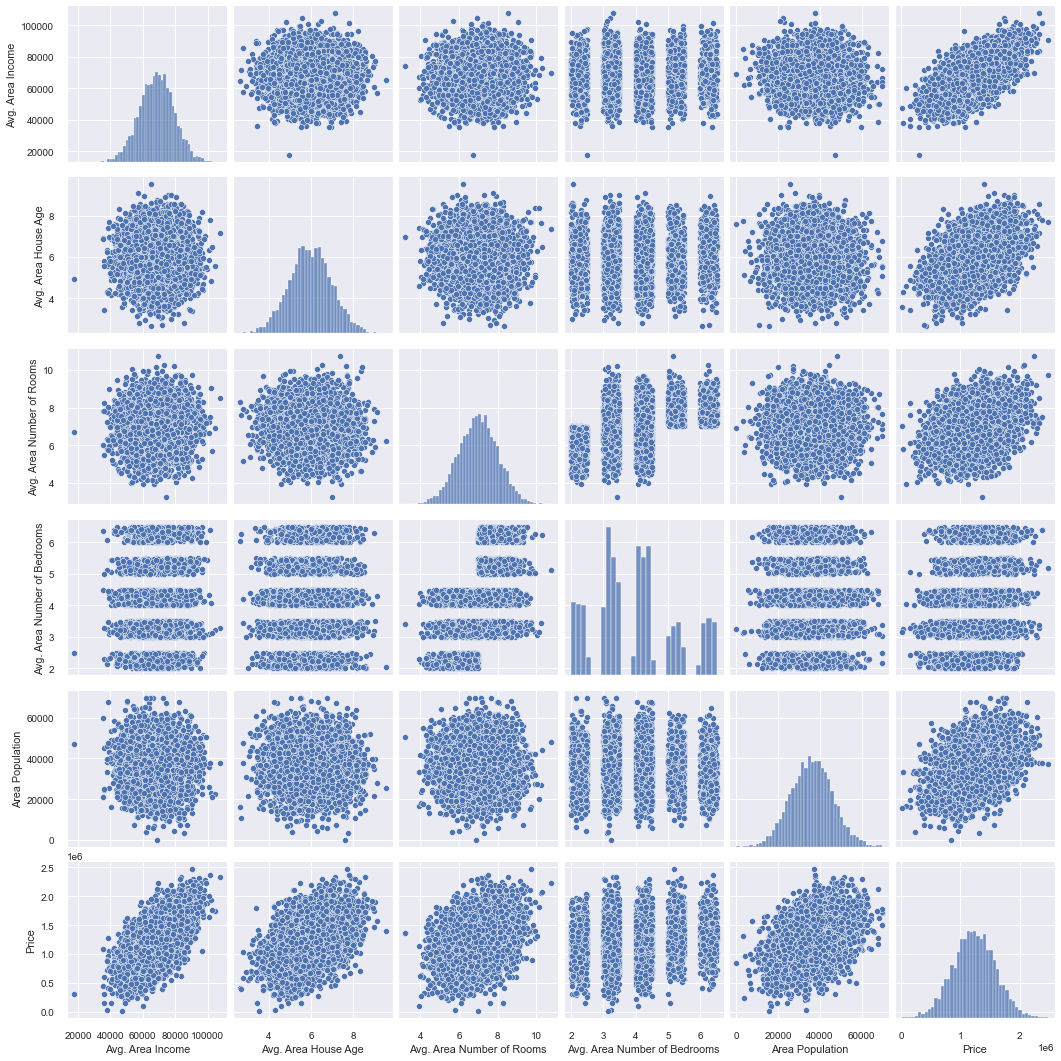

In [11]:
sns.set(font_scale = .9)
ax = sns.pairplot(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population','Price']])


<AxesSubplot:xlabel='Price', ylabel='Count'>

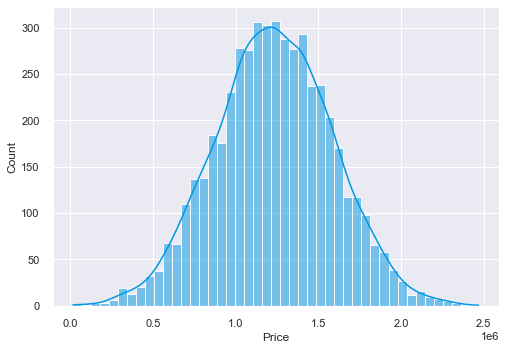

In [12]:
sns.set(font_scale = 1)
sns.histplot(df['Price'],kde = True,color = '#0097e3')

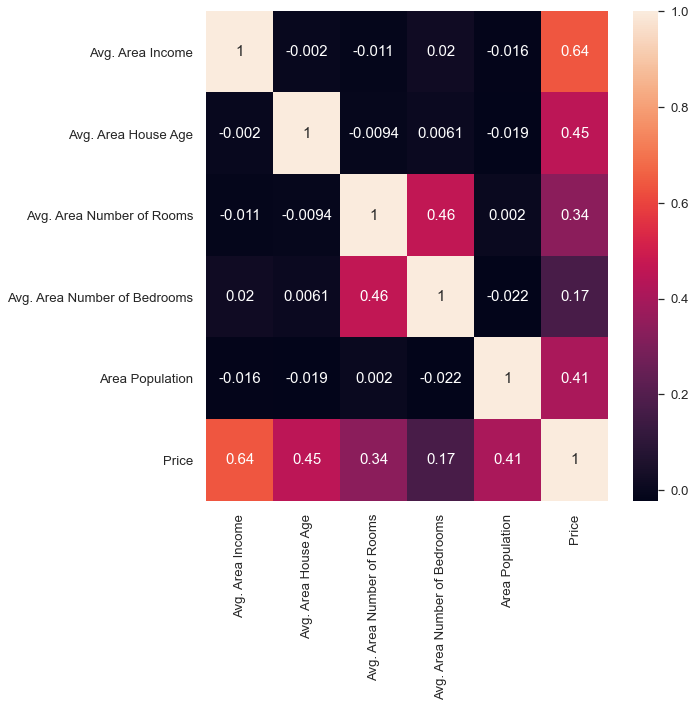

In [13]:
sns.set(font_scale = 1.2)
fig,ax = plt.subplots(figsize = (9,9))
ax = sns.heatmap(df.corr(), annot=True,annot_kws={'size':15})

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [14]:
X = df.drop(['Price','Address'],axis = 1)
y = df['Price']

### Train-Test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


### Evaluate performance

In [43]:
from sklearn import metrics
def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square    

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [53]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

In [54]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016

------TRAIN------
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

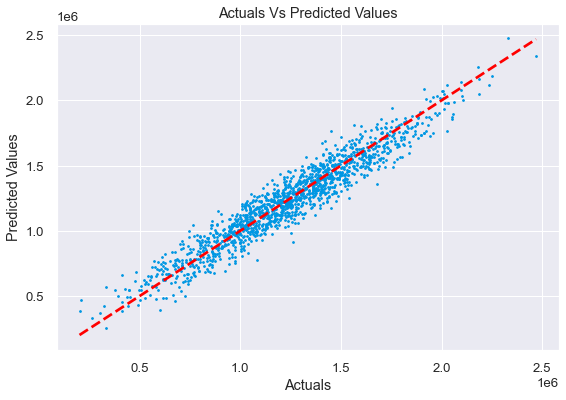

In [39]:
fig,ax = plt.subplots(figsize = (9,6))
plt.scatter(y_test, y_pred, c='#0097e3',s = 3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='red', lw=2.7)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

### Ridge Regression (L2 Regularization)

In [75]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.8)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1.8)

In [76]:
test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

In [77]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 81136.10774758736
MSE: 10068356430.365574
RMSE: 100341.20006440811
R2 Square 0.9146824101741363

------TRAIN------
MAE: 81483.3720486969
MSE: 10287076197.838194
RMSE: 101425.224662498
R2 Square 0.9192983987367468


### Lasso Regression (L1 Regularization)

In [81]:
from sklearn.linear_model import Lasso
lasso_reg = Ridge(alpha=1)
lasso_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [83]:
test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

In [84]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 81135.8326004531
MSE: 10068378138.620092
RMSE: 100341.30823653881
R2 Square 0.9146822262219723

------TRAIN------
MAE: 81482.06396703914
MSE: 10287053362.896975
RMSE: 101425.11209210948
R2 Square 0.9192985778757252


### ElasticNet Regression (L1 + L2)

### Polynomial Regression

In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
ploy_reg = LinearRegression()
ploy_reg.fit(X_poly, y_train)

LinearRegression()

In [102]:
test_pred = ploy_reg.predict(poly_reg.fit_transform(X_test))
train_pred = ploy_reg.predict(poly_reg.fit_transform(X_train))

In [103]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 81401.99899350265
MSE: 10182742266.913319
RMSE: 100909.57470385711
R2 Square 0.9137131234835068

------TRAIN------
MAE: 81100.98711807326
MSE: 10152264238.189013
RMSE: 100758.4449968786
R2 Square 0.9203559918568807


In [23]:
def input_fratures():
    income =input("Enter income")
    house_age =input("Enter house age")
    rooms =input("Enter no of rooms")
    bedrooms =input("Enter no of bedrooms")
    population =input("Enter area population")
    features = np.array([income,house_age,rooms,bedrooms,population],dtype = np.float).reshape(1,-1)
    transformed = pipeline.transform(features)
    pred = lin_reg.predict(transformed)
    return f"Predicted Value is ${pred[0].round(2)}"
    
    
    